In [1]:
%matplotlib notebook

In [2]:
from simple_network_utils import *
from cell_utils import *

In [3]:
from dentate.biophysics_utils import *
from scipy.optimize import minimize

In [4]:
pc = h.ParallelContext()
pop_sizes = {'E': 1, 'I': 1, 'FF_E': 1, 'FF_I': 1}
pop_gid_ranges = {'E': (0, 1), 'FF_E': (1, 2), 'FF_I': (2, 3), 'I': (3, 4)}
pop_cell_types = {'E': 'IB_orig', 'FF_E': 'input', 'FF_I': 'input', 'I': 'FS_orig'}
connection_syn_types = {'E': 'E', 'FF_E': 'E', 'FF_I': 'I', 'I': 'I'}
prob_connection = {'E': {'FF_E': 1., 'FF_I': 1.}, 'I': {'FF_E': 1., 'FF_I': 1.}}
connection_weights_mean = {'E': {'FF_E': 0.01, 'FF_I': 0.01}, 'I': {'FF_E': 0.01, 'FF_I': 0.01}}
connection_weights_norm_sigma = {'E': {'FF_E': 0.1, 'FF_I': 0.1}, 'I': {'FF_E': 0.1, 'FF_I': 0.1}}
connection_kinetics = {'E': {'E': 5., 'I': 10.}, 'I': {'E': 5., 'I': 10.}}
network = SimpleNetwork(pc=pc, pop_sizes=pop_sizes, pop_gid_ranges=pop_gid_ranges, pop_cell_types=pop_cell_types, \
                  connection_syn_types=connection_syn_types, prob_connection=prob_connection, \
                  connection_weights_mean=connection_weights_mean, \
                  connection_weights_norm_sigma=connection_weights_norm_sigma, \
                  connection_kinetics=connection_kinetics, verbose=2)
print h.celsius
sim = QuickSim(cvode=False)
print h.celsius

SimpleNetwork.mkcells: rank: 0 got FF_E gid: 1
SimpleNetwork.mkcells: rank: 0 got FF_I gid: 2
SimpleNetwork.mkcells: rank: 0 got E gid: 0
SimpleNetwork.mkcells: rank: 0 got I gid: 3
SimpleNetwork.connectcells: rank: 0; target: I gid: 3: source: FF_E; num_syns: 1
SimpleNetwork.connectcells: rank: 0; target: I gid: 3: source: FF_I; num_syns: 1
SimpleNetwork.connectcells: rank: 0; target: E gid: 0: source: FF_E; num_syns: 1
SimpleNetwork.connectcells: rank: 0; target: E gid: 0: source: FF_I; num_syns: 1
35.0
35.0


In [5]:
E_cell = network.cells['E'].itervalues().next()
I_cell = network.cells['I'].itervalues().next()
FF_E_cell = network.cells['FF_E'].itervalues().next()
FF_I_cell = network.cells['FF_I'].itervalues().next()

In [6]:
equilibrate = 250.
step_duration = 300.

In [7]:
sim.append_rec(cell=E_cell, node=E_cell, name=E_cell.name)
sim.append_rec(cell=I_cell, node=I_cell, name=I_cell.name)
# sim.append_rec(cell=E_cell, node=E_cell, object=E_cell.syns['E'], param='_ref_i', name='E_E_syn_i')
# sim.append_rec(cell=E_cell, node=E_cell, object=E_cell.syns['I'], param='_ref_i', name='E_I_syn_i')
# sim.append_rec(cell=I_cell, node=I_cell, object=I_cell.syns['E'], param='_ref_i', name='I_E_syn_i')
# sim.append_rec(cell=I_cell, node=I_cell, object=I_cell.syns['I'], param='_ref_i', name='I_I_syn_i')
sim.append_rec(cell=E_cell, node=E_cell, object=E_cell.izh, param='_ref_u', name='E_izh_u')
sim.append_rec(cell=I_cell, node=I_cell, object=I_cell.izh, param='_ref_u', name='I_izh_u')
sim.append_rec(cell=E_cell, node=E_cell, object=E_cell.izh, param='_ref_i', name='E_izh_i')
sim.append_rec(cell=I_cell, node=I_cell, object=I_cell.izh, param='_ref_i', name='I_izh_i')
sim.append_stim(name='E_step', cell=E_cell, node=E_cell, amp=0., delay=equilibrate, dur=step_duration)
sim.append_stim(name='I_step', cell=I_cell, node=I_cell, amp=0., delay=equilibrate, dur=step_duration)

Simulation runtime: 0.16 s


<IPython.core.display.Javascript object>


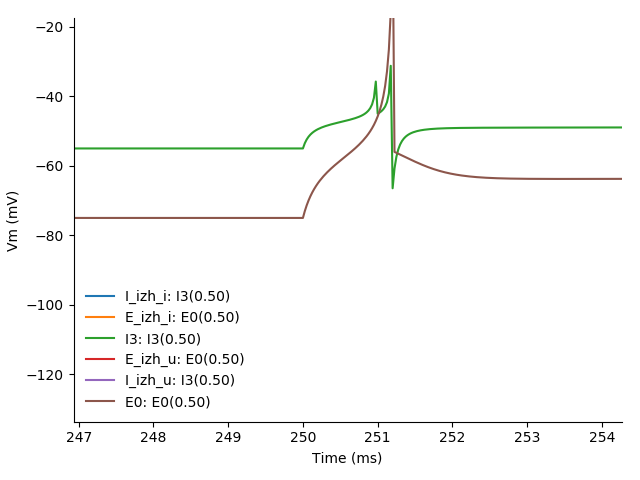

In [8]:
step_amp = 0.3
ISI = 10.
num_spikes = 5
spike_train = [equilibrate + ISI * i for i in xrange(num_spikes)]
sim.tstop = equilibrate + max(step_duration, ISI * num_spikes) + 100.
FF_E_cell.load_vecstim([])
FF_I_cell.load_vecstim([])
# FF_E_cell.load_vecstim(spike_train)
# FF_I_cell.load_vecstim(spike_train)
sim.modify_stim(name='E_step', amp=step_amp)
sim.modify_stim(name='I_step', amp=step_amp)
sim.run()
sim.plot()

In [9]:
I_cell.cell_type

'FS_orig'

In [10]:
I_cell.izh.d

-55.0

In [11]:
h.celsius

35.0